In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.spatial.distance import cosine
import plotly.express as px
import os
from operator import itemgetter
import matplotlib.pyplot as plt
from scipy import special

## Labels

### D2KAB

In [2]:
fcu_d2kab = pd.read_csv("output/fcu.csv", delimiter="\t", encoding='utf-8')
fcu_d2kab[:3]

bsv  type  length  \
0  20180911_bsv_grandes_cultures-26_cle0f15a8  html   12959   
1  20180911_bsv_grandes_cultures-26_cle0f15a8  html   12959   
2  20180911_bsv_grandes_cultures-26_cle0f15a8  html   12959   

               context      word prefLabel             context.1 location  \
0           ACTUALITÉS     Colza     colza   Limaces à surveille    13-18   
1  es grosses altises.      Maïs      maïs    Compter les larves  151-155   
2  A LOIRE BSV GRANDES  CULTURES   Culture  -DU 11 SEPTEMBRE N °  313-321   

                                            features  
0  type=GOL, uri=http://ontology.inrae.fr/frenchc...  
1  type=GOL, uri=http://ontology.inrae.fr/frenchc...  
2  type=GOL, uri=http://ontology.inrae.fr/frenchc...

In [3]:
fcu_d2kab['prefLabel'].describe()

count       11873
unique        174
top       Culture
freq         1990
Name: prefLabel, dtype: object

In [4]:
fcu_d2kab['bsv'].describe()

count                                                 11873
unique                                                  230
top       BSV_legumes_allium_pomme_de_terre_AURA_2019-14...
freq                                                    325
Name: bsv, dtype: object

In [5]:
counts_d2kab = fcu_d2kab['prefLabel'].value_counts()
dico_d2kab = counts_d2kab.to_dict()
dico_d2kab

{'Culture': 1990,
 'vigne': 1072,
 'colza': 655,
 'chou': 407,
 'chou potager': 407,
 'blé': 384,
 'maïs': 377,
 'tomate': 346,
 'culture fruitière': 294,
 'arbuste à baies': 286,
 'carotte': 254,
 'culture légumière': 238,
 'pois': 235,
 'maraîchage': 219,
 'poireau': 204,
 'céréale à paille': 197,
 'céréale': 166,
 'céleri': 164,
 'tournesol': 164,
 'oignon': 154,
 'floriculture': 142,
 'salade': 140,
 'pommier': 135,
 'betterave': 133,
 'aubergine': 126,
 'blé tendre': 125,
 'pomme de terre': 119,
 'semence': 107,
 'concombre': 100,
 'orge': 100,
 'gel': 96,
 'lin': 83,
 'courgette': 76,
 'oranger': 74,
 'poirée': 71,
 'poivron': 70,
 'melon': 69,
 'blé dur': 62,
 'légume à graines ou à gousses': 60,
 'fraisier': 59,
 'haricot': 57,
 'laitue': 53,
 'courge': 46,
 'oléagineux': 46,
 'soja': 44,
 'radis': 44,
 'pois protéagineux de printemps': 43,
 'navet potager': 42,
 'arboriculture fruitière': 42,
 'vigne de cuve': 35,
 'chicorée endive': 35,
 'lin oléagineux': 34,
 'épinard': 31,


In [6]:
features_d2kab = list(dico_d2kab.values()) 
true_labels_d2kab = list(dico_d2kab.keys())
freq_df = px.data.iris() 
fig = px.scatter(fcu_d2kab, x=true_labels_d2kab, y=features_d2kab)
fig.show()

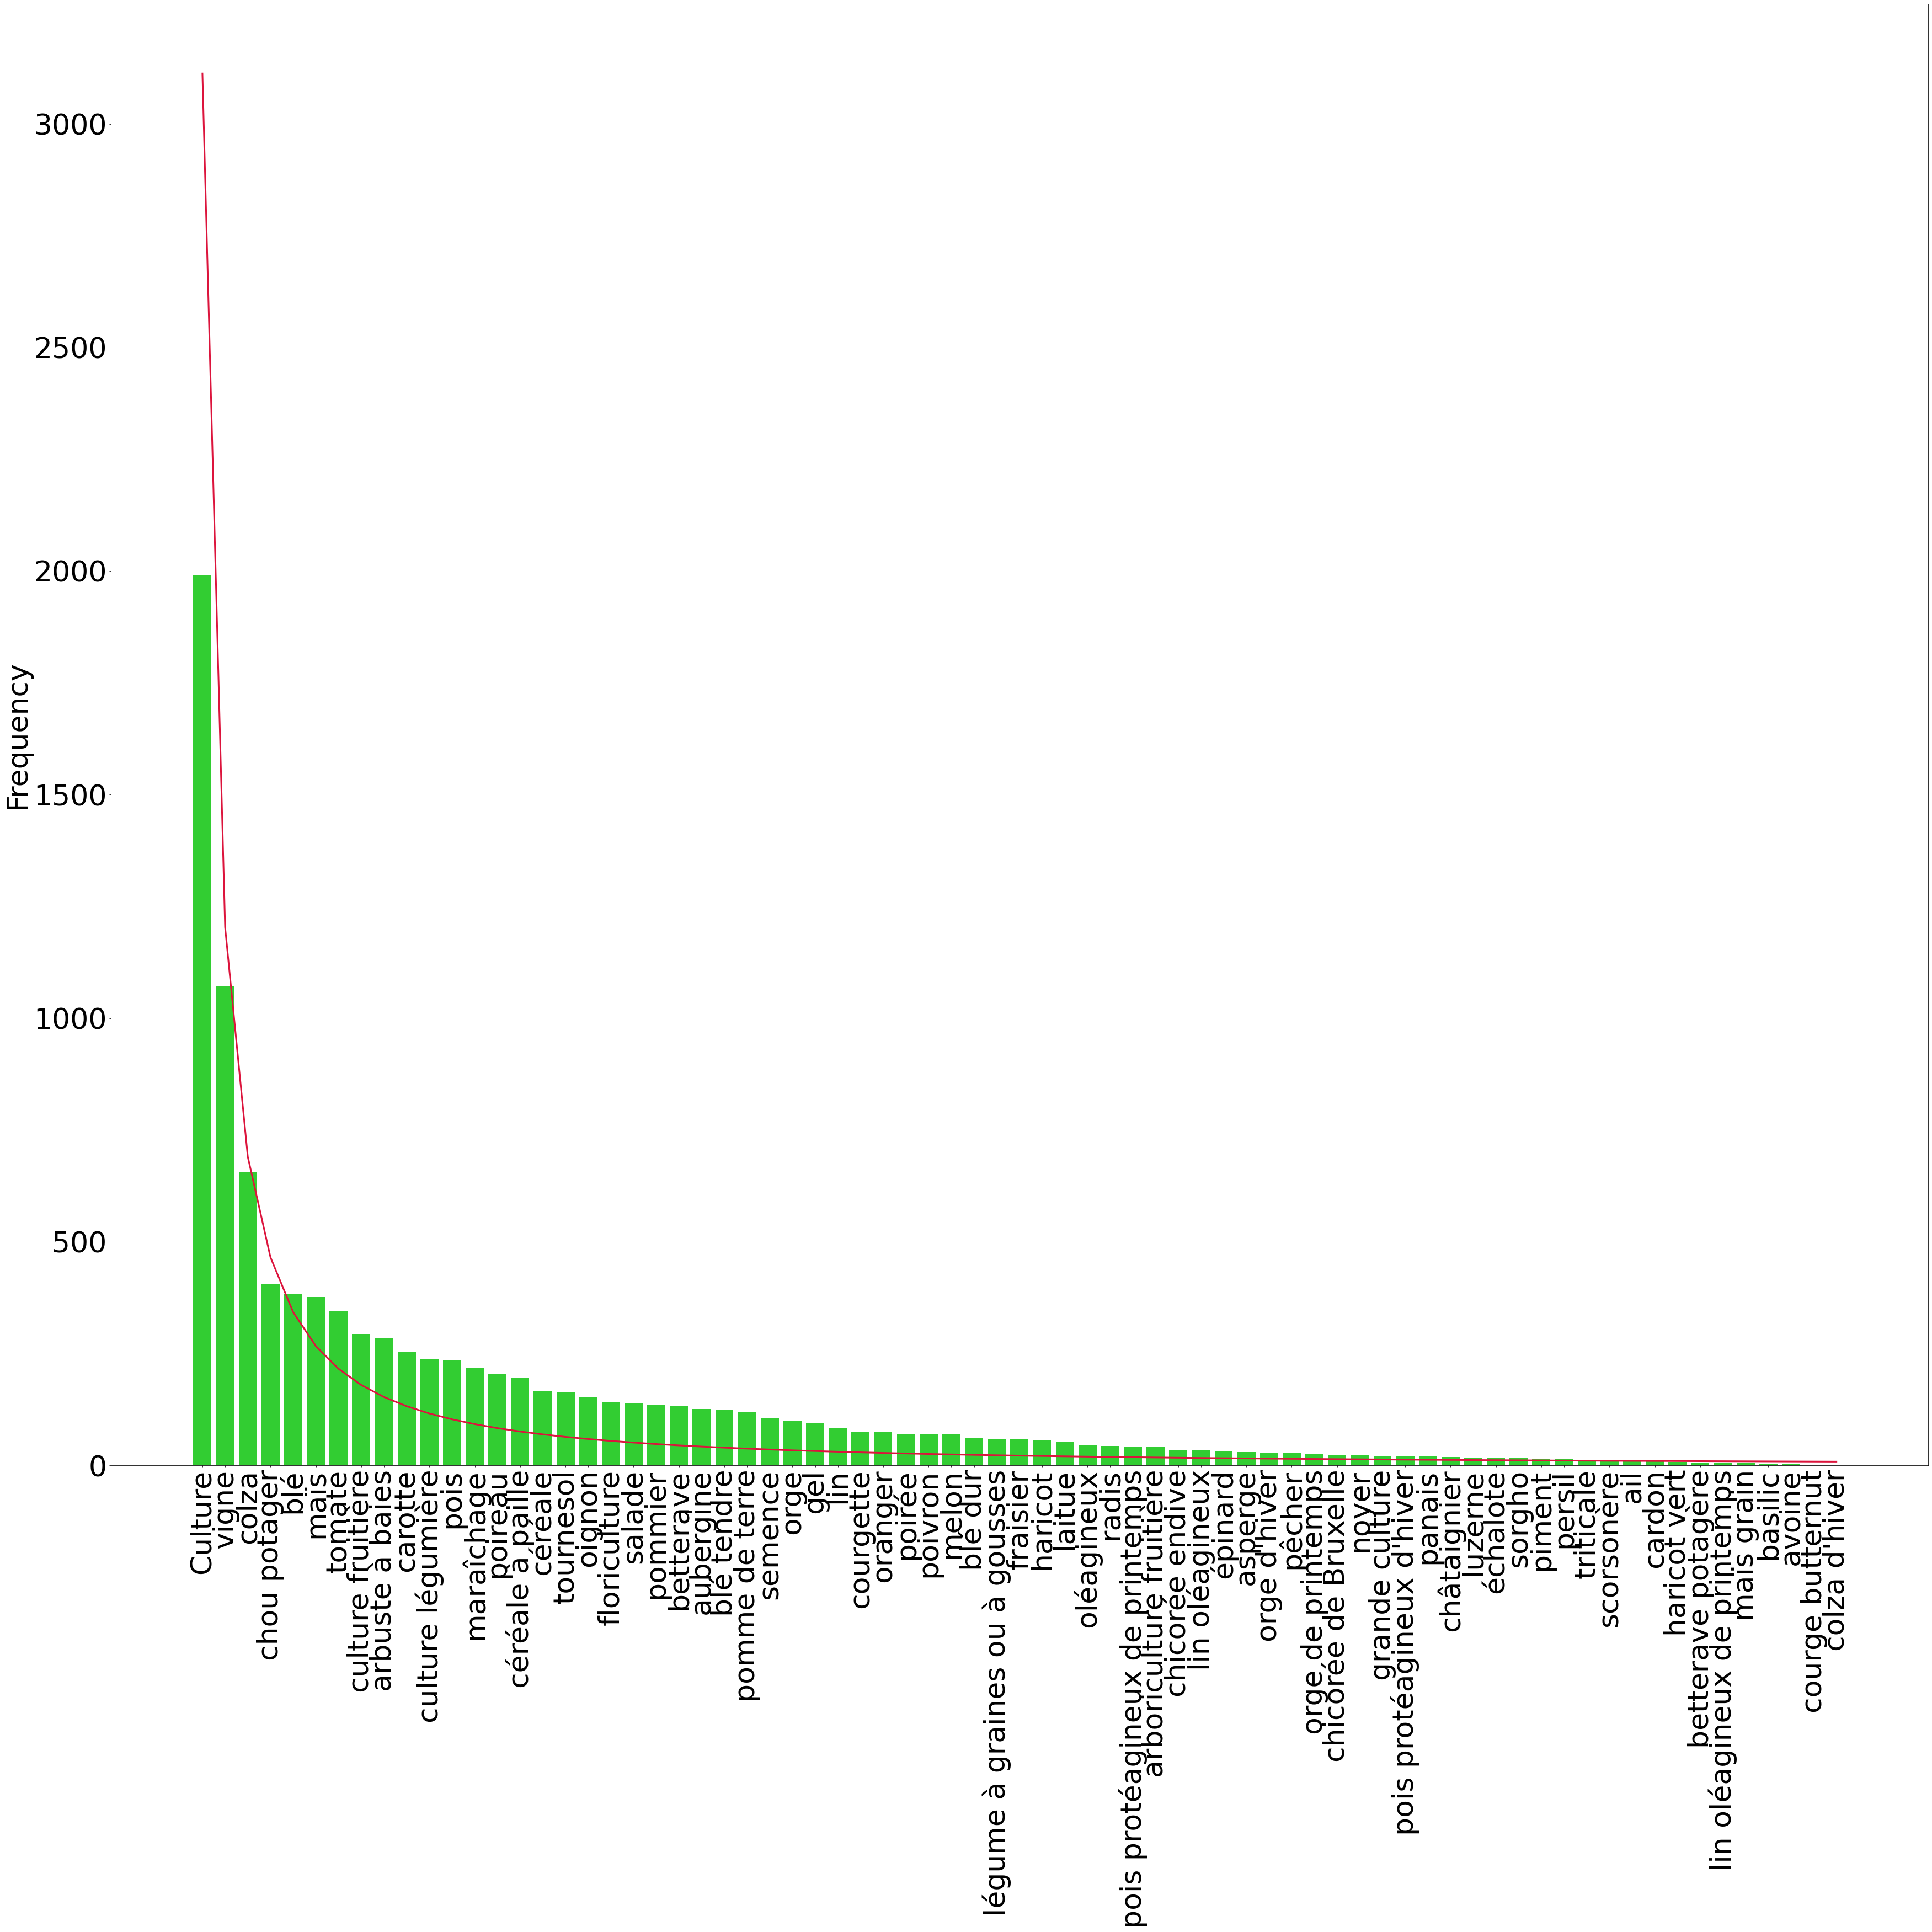

In [46]:
#zipf law :
#the most frequent word occurs twice as often as the second most frequent work
#three times as often as the subsequent word, and so on until the least frequent word

import matplotlib.pyplot as plt
from scipy.stats import zipf

inv_map = {v: k for k, v in counts_d2kab.items()}
lst = list(inv_map.items())

plt.bar([key for val, key in lst], [val for val, key in lst], color='limegreen')
alpha = 1.37065874
total = sum([p for p, c in lst])
plt.plot(range(len(lst)), [zipf.pmf(p, alpha) * total for p in range(1, len(lst) + 1)], color='crimson', lw=3)
plt.ylabel("Frequency")
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (100,50)
plt.rcParams.update({'font.size': 52})
#plt.xlabel('xlabel', fontsize=56)
# plot has more area below the expected zipf curve in higher rank words, and inverse for those that are more important
plt.show()

In [8]:
from scipy import stats
import re, operator

def zipfFit(fdist, name, toPlot=False, pr=False, ret=True):
    fsort_tuple = sorted(fdist.items(), key=operator.itemgetter(1),
    reverse=True)
    y_vals = np.array([t[1] for t in fsort_tuple])
    x_vals = np.array(range(1, len(y_vals) + 1))
    if toPlot:
        plt.title(name)
        plt.rcParams['figure.figsize'] = (50.0, 50.0)
        plt.plot([np.log(x) for x in x_vals], 
            [np.log(y) for y in y_vals], 'ro')
        plt.xlabel('log(rank)')
        plt.ylabel('log(count)')
        plt.show()
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        np.log(x_vals.astype(float)),
        np.log(y_vals.astype(float)))
    if pr:
        print("log-log r-squared for " + name + ":", r_value**2)
    if ret:
        return([slope, intercept, r_value**2])

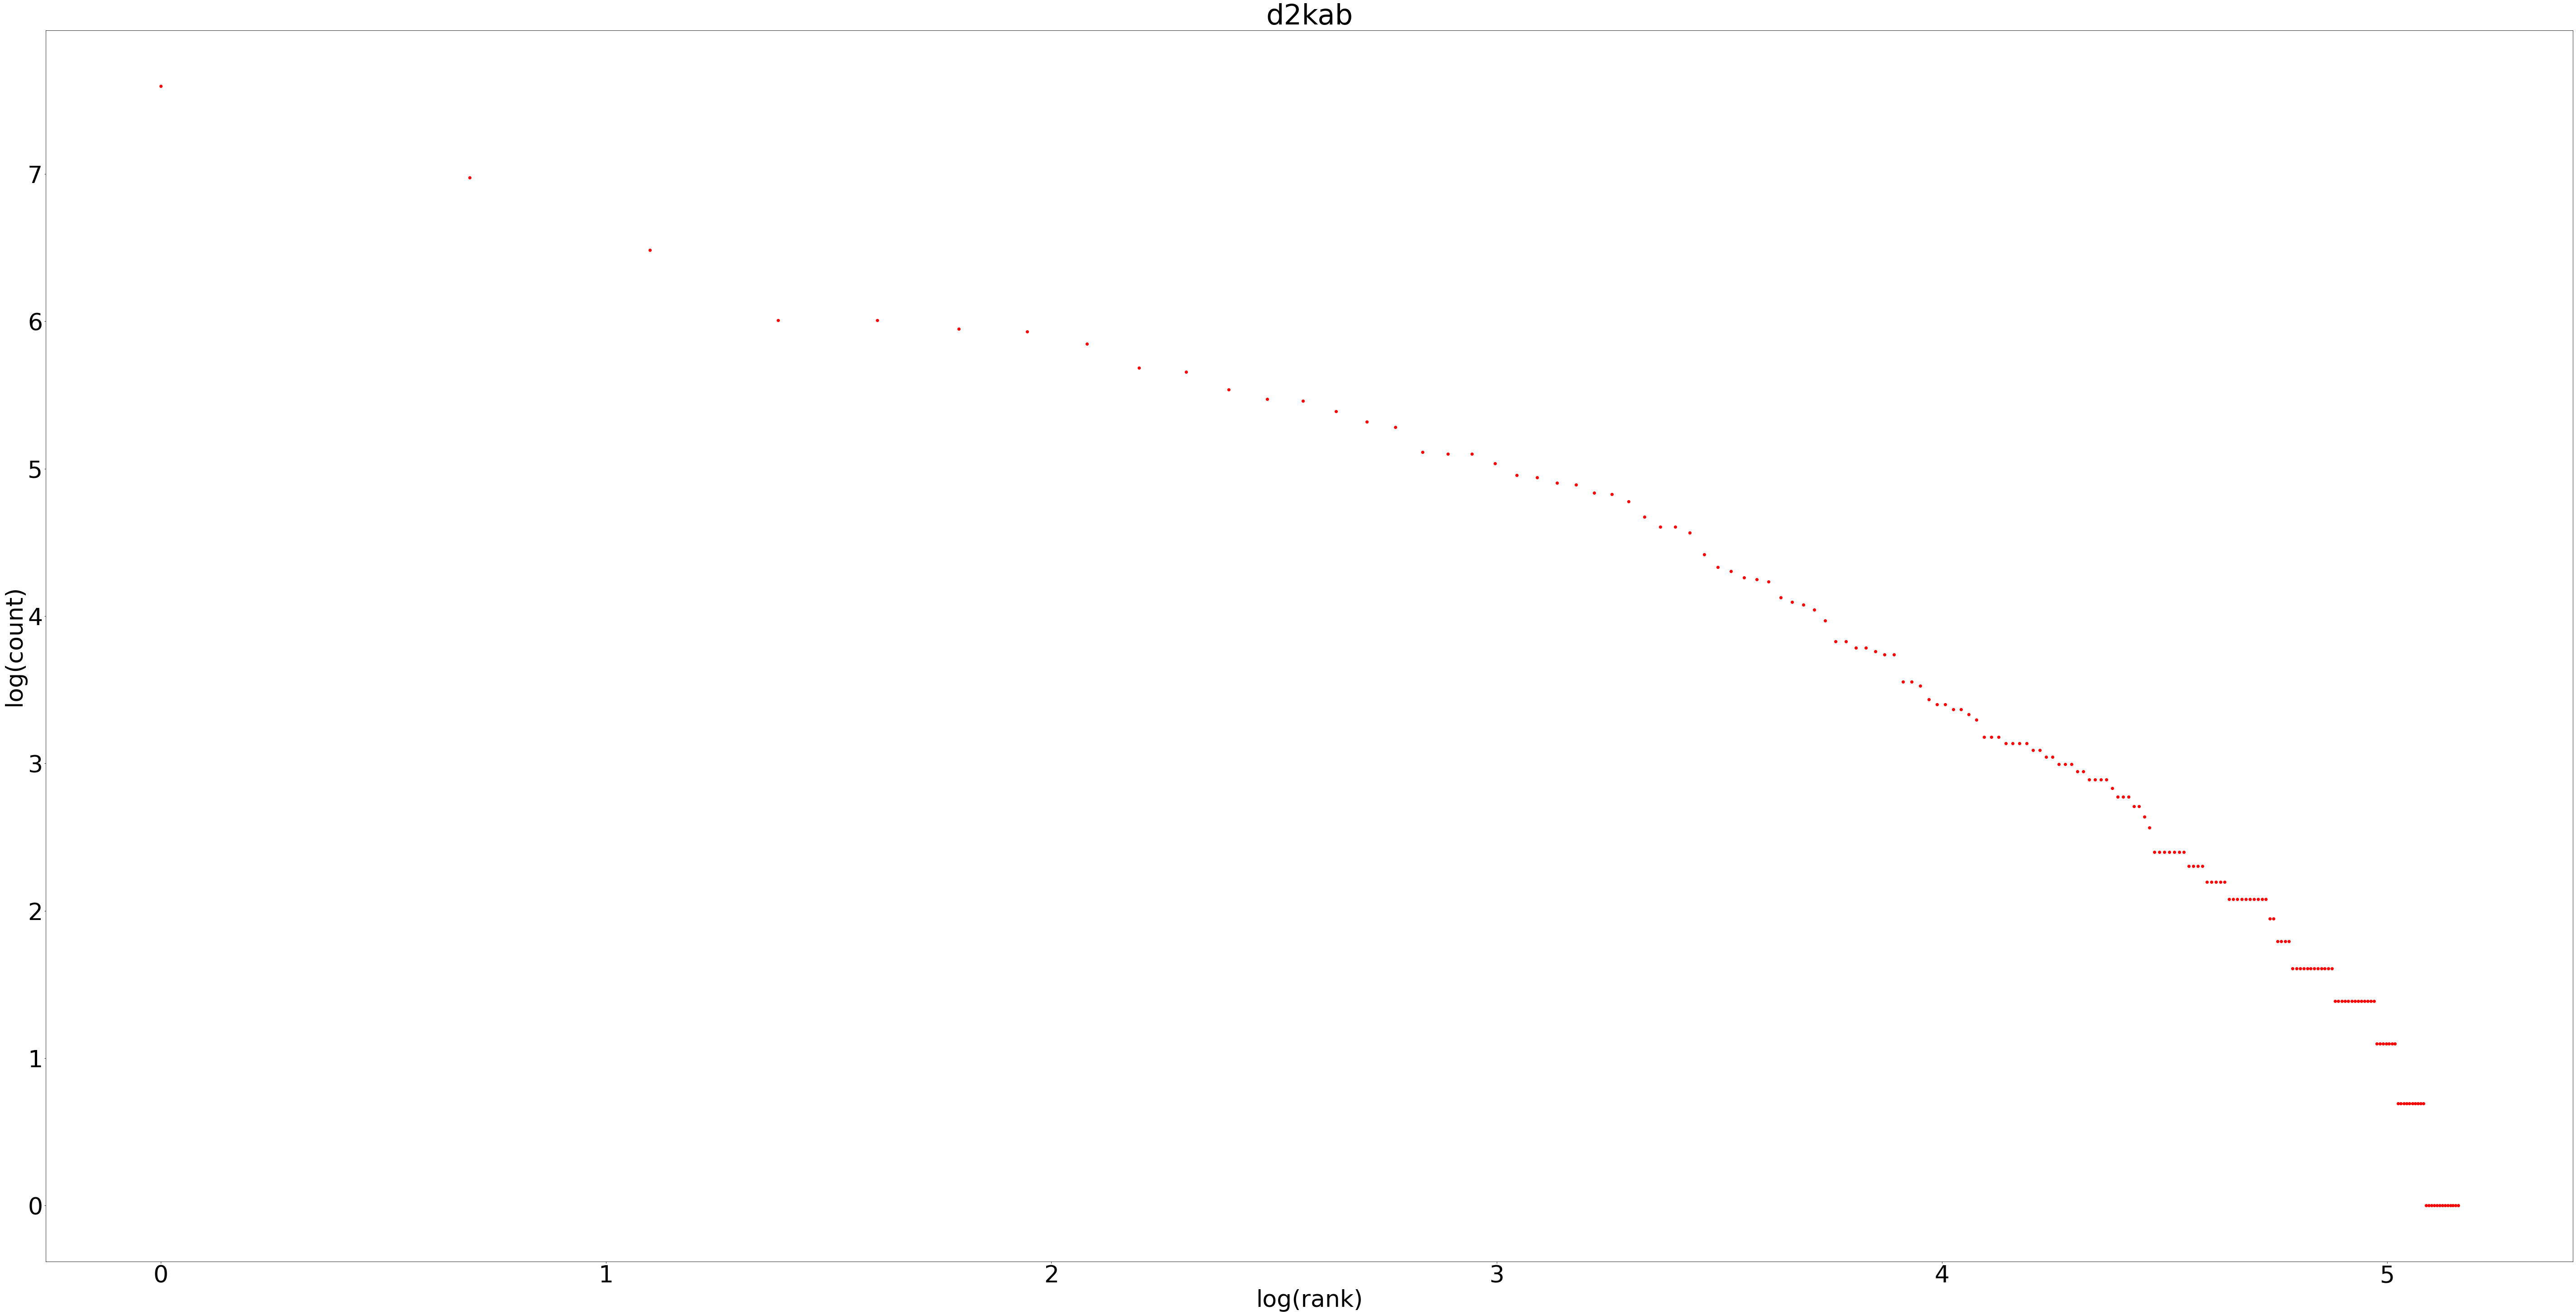

log-log r-squared for d2kab: 0.8980794192458799


In [9]:
# At the extreme right end of the plotted line, there are apparent steps, 
# which means that a lot of words have quite low occurences. 
# At the extreme left end, the line is quite flat, 
# which means the frequencies of the first few most frequent words are close that they do not drop as quickly as the ones ranking in the middle.

    
zipfFit(counts_d2kab, 'd2kab', toPlot=True, pr=True, ret=False)

### VESPA

In [10]:
vespa = pd.read_csv("output/fcu_vespa.csv", delimiter="\t", encoding='utf-8')
vespa[:3]

bsv  type  length             context          word  \
0  01F57Zd3vFWg1itsp44SIT8E  html    4471            SOMMAIRE  Clémentinier   
1  01F57Zd3vFWg1itsp44SIT8E  html    4471  mentinier SOMMAIRE  Clémentinier   
2  01F57Zd3vFWg1itsp44SIT8E  html    4471  : Grossissement du         fruit   

           prefLabel            context.1 location  \
0       clémentinier   SOMMAIRE Clémentin    10-22   
1       clémentinier  Bulletin de Santé d    33-45   
2  culture fruitière  - Chute physiologiq  390-395   

                                            features  
0  type=GOL, uri=http://ontology.inrae.fr/frenchc...  
1  type=GOL, uri=http://ontology.inrae.fr/frenchc...  
2  type=GOL, uri=http://ontology.inrae.fr/frenchc...

In [11]:
vespa['prefLabel'].describe()

count       16510
unique        203
top       Culture
freq         2307
Name: prefLabel, dtype: object

In [12]:
vespa['bsv'].describe()

count                  16510
unique                   445
top       BSV_legumes_11_002
freq                     532
Name: bsv, dtype: object

In [13]:
corpus_vespa = os.listdir("resources/corpusVespa.html")
print("Corpus Vespa contient {} bsv en total".format(len(corpus_vespa)))

Corpus Vespa contient 497 bsv en total


In [14]:
counts_vespa = vespa['prefLabel'].value_counts()
dico_vespa = counts_vespa.to_dict()
dico_vespa

{'Culture': 2307,
 'culture fruitière': 762,
 'pommier': 742,
 'colza': 696,
 'arboriculture fruitière': 561,
 'pois': 494,
 'blé': 394,
 'chou': 380,
 'chou potager': 380,
 'céréale': 354,
 'floriculture': 347,
 'poirier': 339,
 'zone non agricole': 335,
 'arboriculture': 333,
 'vigne': 314,
 'carotte': 305,
 'lin': 281,
 'maïs': 267,
 'culture légumière': 257,
 'oignon': 236,
 'poireau': 229,
 'féverole': 224,
 'pomme de terre': 205,
 'tournesol': 172,
 'betterave': 171,
 'céleri': 146,
 'oléagineux': 146,
 'salade': 145,
 'prunier': 143,
 'céréale à paille': 140,
 'tomate': 134,
 'horticulture ornementale': 130,
 'jardin': 127,
 'lin oléagineux': 125,
 'orge': 122,
 'noyer': 121,
 'protéagineux': 117,
 'pêcher': 116,
 'semence': 114,
 'fraisier': 111,
 'cerisier': 110,
 'châtaignier': 102,
 'blé tendre': 102,
 'rosier': 102,
 'pois protéagineux de printemps': 100,
 'poirée': 99,
 'persil': 96,
 'légume à graines ou à gousses': 91,
 'laitue': 78,
 'melon': 77,
 "pois protéagineux d'h

In [15]:
features_vespa = list(dico_vespa.values()) 
true_labels_vespa = list(dico_vespa.keys())
freq_df_vespa = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(freq_df_vespa, x=true_labels_vespa, y=features_vespa)
fig.show()

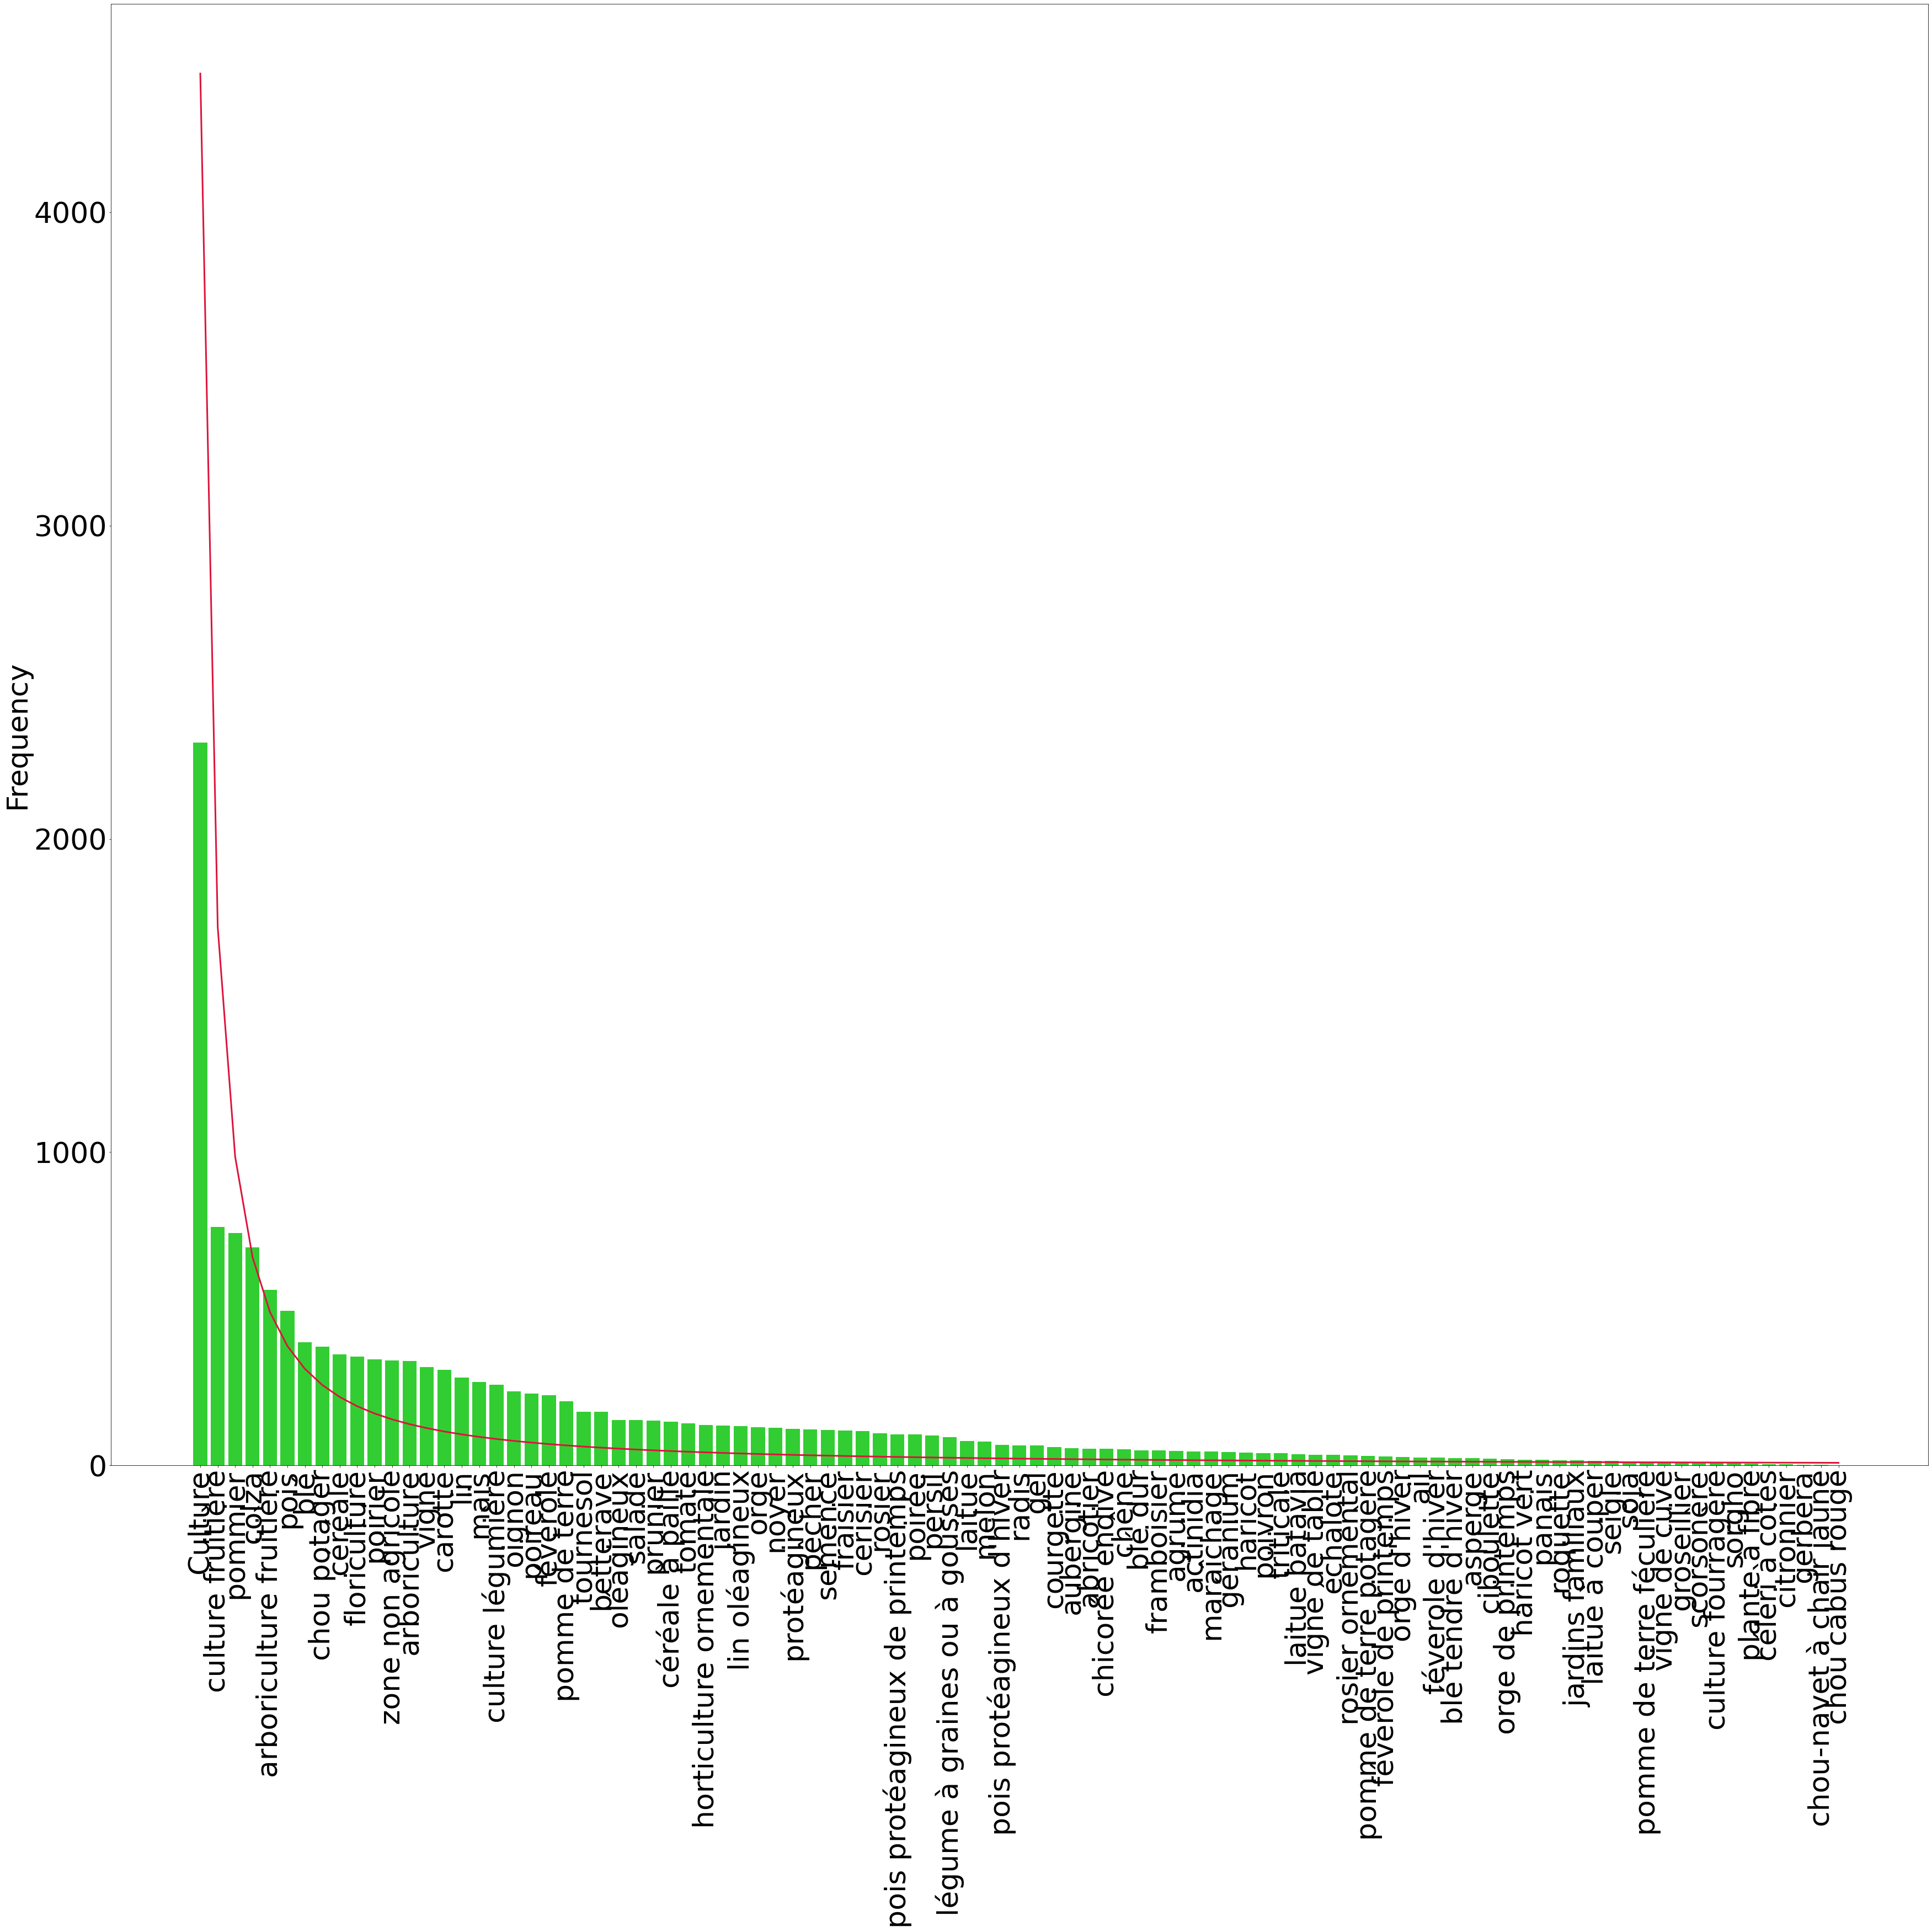

In [16]:
import matplotlib.pyplot as plt
from scipy.stats import zipf

inv_map = {v: k for k, v in counts_vespa.items()}
lst = list(inv_map.items())

plt.bar([key for val, key in lst], [val for val, key in lst], color='limegreen')
alpha = 1.37065874
total = sum([p for p, c in lst])
plt.plot(range(len(lst)), [zipf.pmf(p, alpha) * total for p in range(1, len(lst) + 1)], color='crimson', lw=3)
plt.ylabel("Frequency")
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (100,50)
plt.rcParams.update({'font.size': 52})
plt.show()

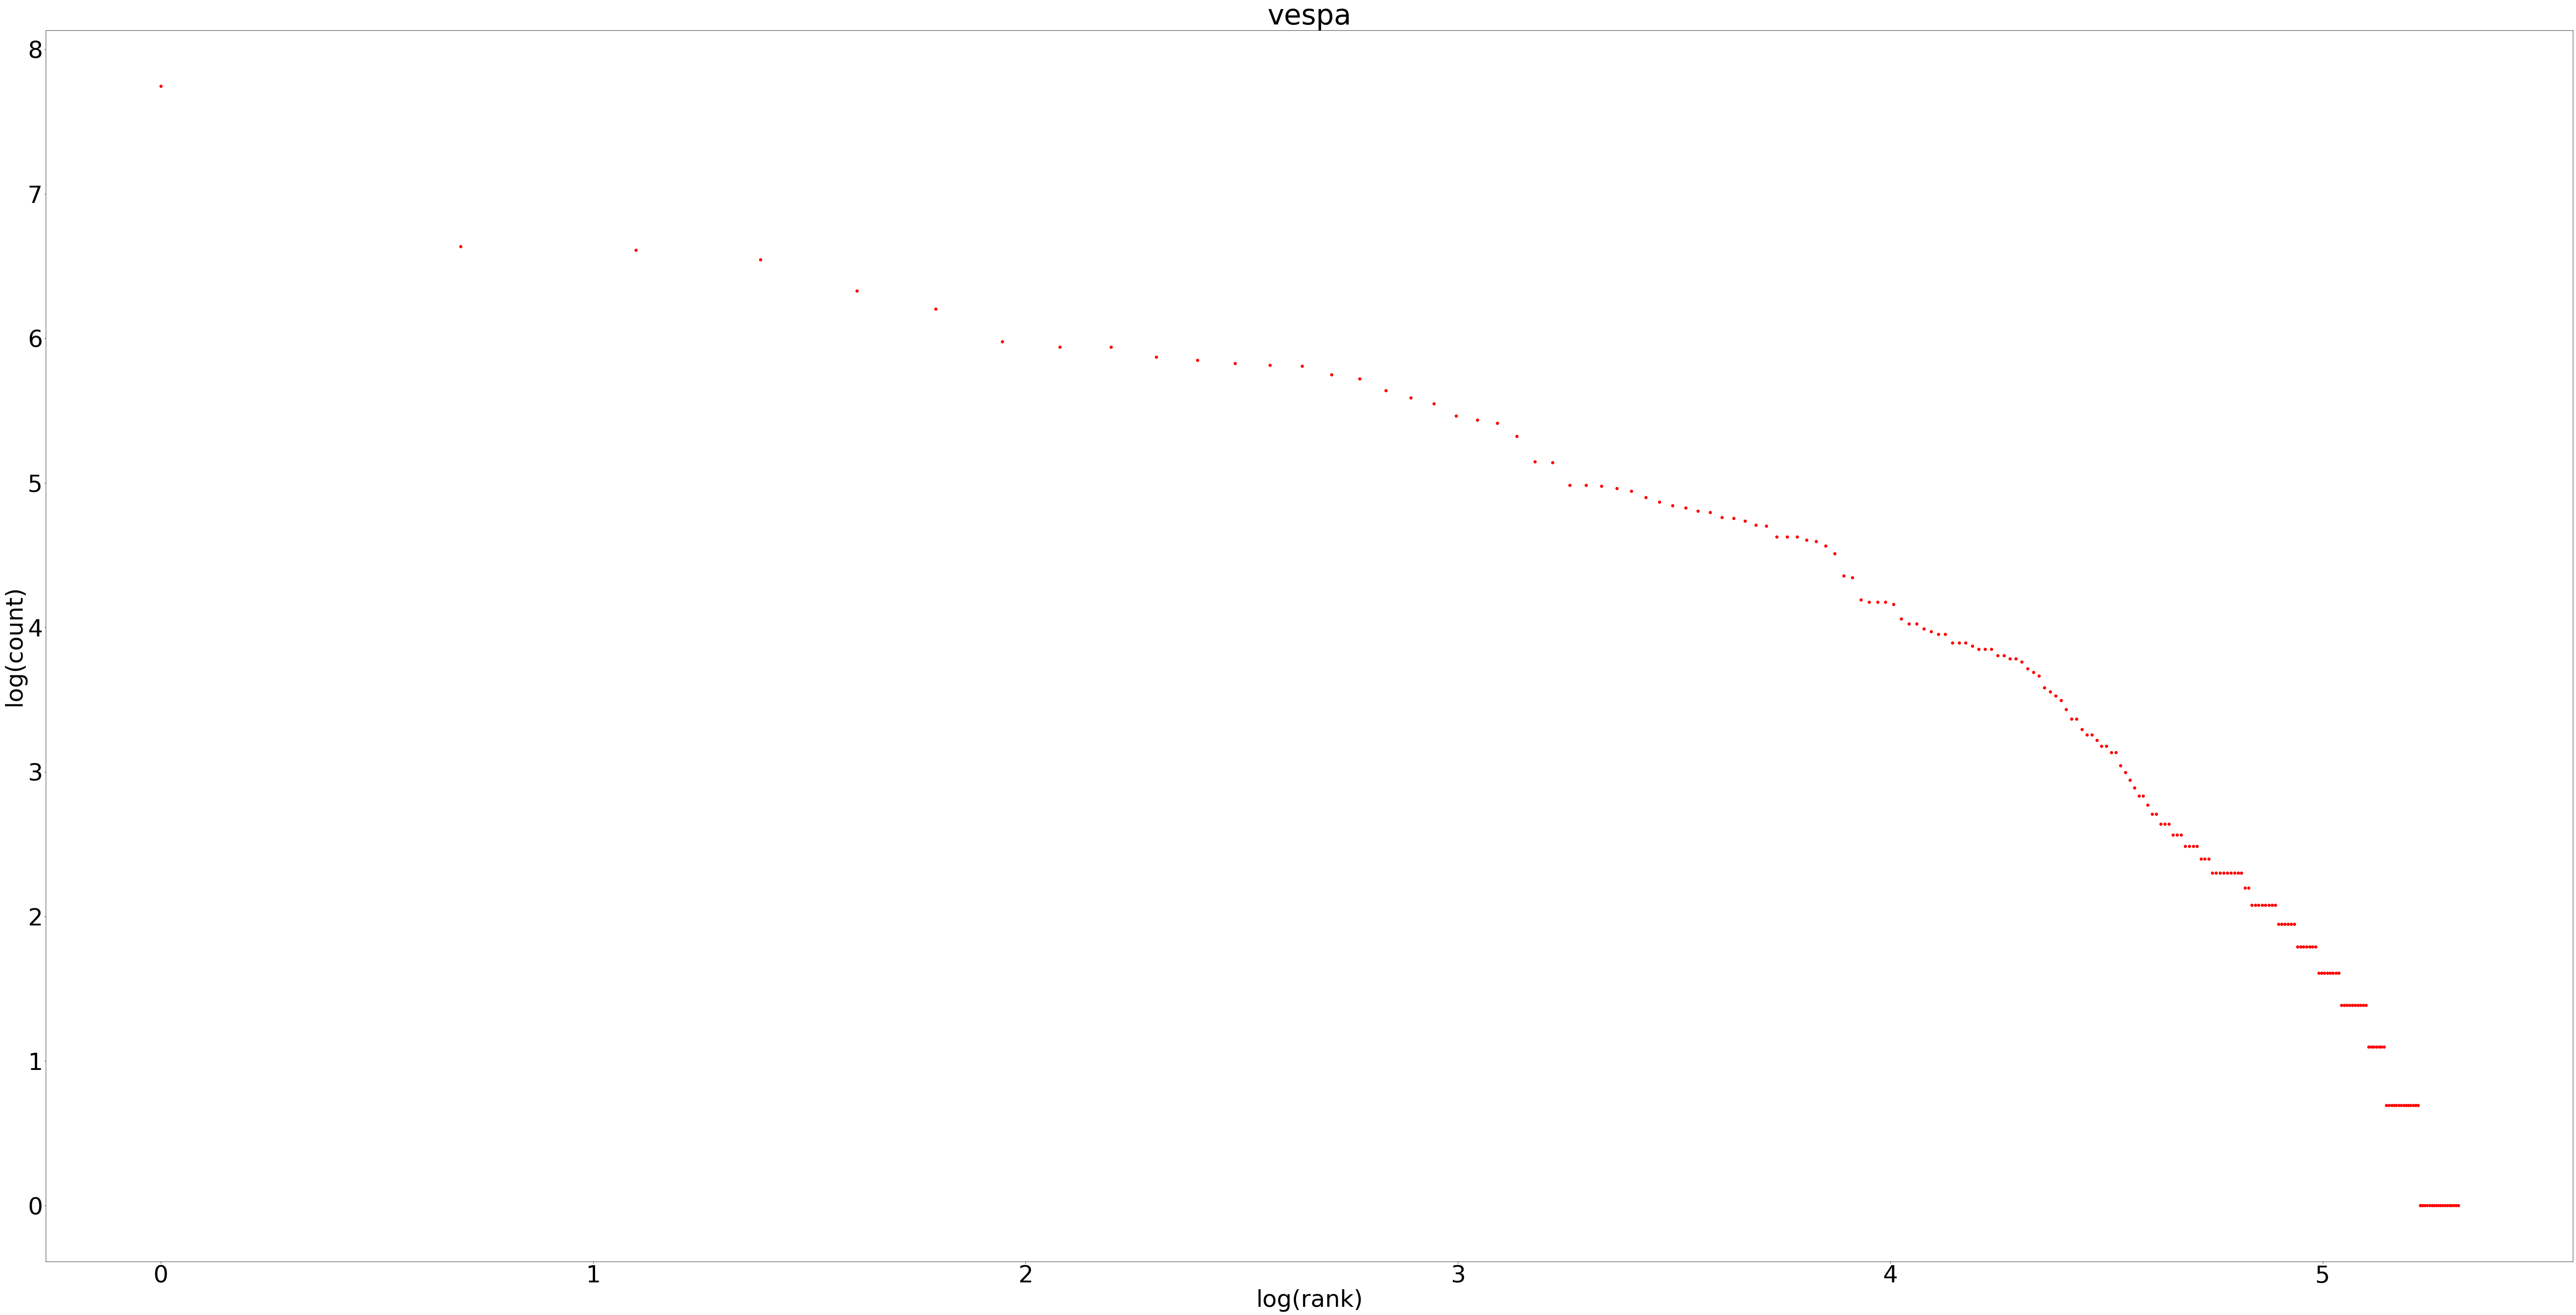

log-log r-squared for vespa: 0.8523471115535772


In [17]:
# At the extreme right end of the plotted line, there are apparent steps, 
# which means that a lot of words have quite low occurences. 
# At the extreme left end, the line is quite flat, 
# which means the frequencies of the first few most frequent words are close that they do not drop as quickly as the ones ranking in the middle.

    
zipfFit(counts_vespa, 'vespa', toPlot=True, pr=True, ret=False)

### D2KAB vs VESPA

In [18]:
# comparaison
freq_d2kab = pd.DataFrame({'prefLabel':counts_d2kab.index, 'd2kab':counts_d2kab.values})
freq_vespa = pd.DataFrame({'prefLabel':counts_vespa.index, 'vespa':counts_vespa.values})

In [19]:
freq_d2kab['prefLabel'].isin(freq_vespa['prefLabel']).value_counts()

True     159
False     15
Name: prefLabel, dtype: int64

In [20]:
freq_d2kab[~freq_d2kab['prefLabel'].isin(freq_vespa['prefLabel'])]

prefLabel  d2kab
67                      grande culture     22
70                         pois chiche     20
102                             cardon      9
106                              ricin      8
124                         potimarron      5
125  arboriculture fruitière tropicale      5
129                           pastèque      5
131                            potiron      4
134                            houblon      4
142                            oseille      4
143                            basilic      4
160                   courge butternut      2
165                   sorgho fourrager      1
166                      légume racine      1
172                    abricotier pays      1

### VESPA vs. D2KAB

In [21]:
freq_vespa['prefLabel'].isin(freq_d2kab['prefLabel']).value_counts()

True     159
False     44
Name: prefLabel, dtype: int64

In [22]:
freq_vespa[~freq_vespa['prefLabel'].isin(freq_d2kab['prefLabel'])]

prefLabel  vespa
70                  actinidia     45
71               chrysanthème     44
101                  cerfeuil     14
103                    seigle     14
110  pomme de terre féculière     12
115                  photinie     10
116         bananier plantain     10
119    olivier fruit à noyaux     10
122               groseillier     10
127                poinsettia      8
131             canne à sucre      8
135                 limettier      7
139                    pomelo      6
140              lin à fibres      6
142                  myrtille      6
144   arbre à fruits à coques      6
145            plante à fibre      6
147    arbre fruitier à noyau      5
149                    millet      5
155                cassissier      4
156               mandarinier      4
159                    tangor      4
165                 calebasse      3
166      culture industrielle      3
167               chou commun      3
168         cerfeuil tubéreux      3
169                   palmier      3
170                   gerbera      3
174                   lavande      2
175                  rhubarbe      2
179                Chou navet      2
182              christophine      2
185        colza de printemps      1
186                 chou-rave      1
187                  échalion      1
189        oranger du Mexique      1
190    lin fibre de printemps      1
192                  fenugrec      1
194                 chou vert      1
195                   arroche      1
196        betterave sucrière      1
199                     brède      1
200            laitue romaine      1
201                   combava      1

In [23]:
# joindre vocabulaires
result = pd.merge(freq_d2kab, freq_vespa, on="prefLabel")
result.sort_values(['d2kab', 'vespa'], ascending=[False, False], inplace=True)
result

prefLabel  d2kab  vespa
0                 Culture   1990   2307
1                   vigne   1072    314
2                   colza    655    696
3                    chou    407    380
4            chou potager    407    380
..                    ...    ...    ...
150  laitue beurre pommée      1      4
152            cognassier      1      2
158         colza d'hiver      1      2
151            chou frisé      1      1
155               chanvre      1      1

[159 rows x 3 columns]

In [24]:
fig = px.bar(result, x="prefLabel", y=["d2kab", "vespa"], title="Term Frequency")
fig.update_layout(
    margin=dict(t=200, r=200, b=200, l=200),
    showlegend=False,
    width=1000, height=1500,
    autosize=False)

fig.write_html("output/freq_d2kab_vespa.html")
fig.show()

In [25]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=result['prefLabel'],
    x=result['d2kab'],
    name='d2kab',
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=result['prefLabel'],
    x=result['vespa'],
    name='vespa',
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack',margin=dict(t=200, r=200, b=200, l=200),
    showlegend=False,
    width=1000, height=1500,
    autosize=False)

fig.write_html("output/diff_d2kab_vespa3.html")
fig.show()

### Difference entre la longueur des corpus

In [26]:
fcu_d2kab['length'].describe()

count    11873.000000
mean     23910.844100
std      14705.871449
min       2326.000000
25%      13961.000000
50%      20660.000000
75%      27532.000000
max      63638.000000
Name: length, dtype: float64

In [27]:
vespa['length'].describe()

count    16510.000000
mean     18662.065294
std      17920.253497
min       1135.000000
25%       7853.000000
50%      12884.000000
75%      20010.000000
max      79218.000000
Name: length, dtype: float64

## Score BM25

### D2KAB

In [28]:
gc = os.listdir("resources/Corpus-v-12-04-21/train/CorpusTestD2kabGC.html")
maraichage = os.listdir("resources/Corpus-v-12-04-21/train/CorpusTestD2kabMaraichage.html")
viticulture = os.listdir("resources/Corpus-v-12-04-21/train/CorpusTestD2kabViti.html")
corpus_len = len(viticulture) + len(maraichage) + len(gc)

In [29]:
bm25_d2kab = pd.read_csv("output/bm25.csv", delimiter="\t", encoding='utf-8')
bm25_d2kab.columns = ['bsv', 'prefLabel', 'score']
bm25_bsv = bm25_d2kab['bsv'].tolist()
bm25_theme = []

for fic in bm25_bsv:
    fic = fic + ".html"
    if fic in gc:
        bm25_theme.append("GC")
    if fic in maraichage:
        bm25_theme.append("Maraichage")
    if fic in viticulture:
        bm25_theme.append("Viticulture")
        
bm25_d2kab['theme'] = bm25_theme
bm25_d2kab

bsv        prefLabel     score  \
0     20180911_bsv_grandes_cultures-26_cle0f15a8  fourrage annuel  6.037748   
1     20180911_bsv_grandes_cultures-26_cle0f15a8          prairie  4.993438   
2     20180911_bsv_grandes_cultures-26_cle0f15a8           pêcher  3.292930   
3     20180911_bsv_grandes_cultures-26_cle0f15a8             maïs  2.556607   
4     20180911_bsv_grandes_cultures-26_cle0f15a8             orge  2.419966   
...                                          ...              ...       ...   
2536  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa        tournesol  2.198931   
2537  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa  arbuste à baies  2.099889   
2538  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa          céréale  1.286451   
2539  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa            vigne  1.204245   
2540  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa          Culture -5.180765   

            theme  
0              GC  
1              GC  
2              GC  
3              GC  
4              GC  
...           ...  
2536  Viticulture  
2537  Viticulture  
2538  Viticulture  
2539  Viticulture  
2540  Viticulture  

[2541 rows x 4 columns]

In [30]:
bm25_d2kab['prefLabel'].describe()

count        2541
unique        174
top       Culture
freq          212
Name: prefLabel, dtype: object

In [31]:
bm25_d2kab.describe()

score
count  2541.000000
mean      2.408349
std       2.574219
min      -5.259228
25%       1.748889
50%       2.645242
75%       3.658414
max      10.276733

In [32]:
fig = px.treemap(bm25_d2kab, path=['theme','prefLabel', 'score'])
fig.show()

In [33]:
fig = px.treemap(bm25_d2kab, path=['prefLabel', 'score'])
fig.show()

In [34]:
grouped = bm25_d2kab.groupby("theme")
for name,group in grouped:
    print(f"First 10 entries for {name!r}")
    print("------------------------")
    print(group.head(10), end="\n\n")

First 10 entries for 'GC'
------------------------
                                          bsv        prefLabel     score theme
0  20180911_bsv_grandes_cultures-26_cle0f15a8  fourrage annuel  6.037748    GC
1  20180911_bsv_grandes_cultures-26_cle0f15a8          prairie  4.993438    GC
2  20180911_bsv_grandes_cultures-26_cle0f15a8           pêcher  3.292930    GC
3  20180911_bsv_grandes_cultures-26_cle0f15a8             maïs  2.556607    GC
4  20180911_bsv_grandes_cultures-26_cle0f15a8             orge  2.419966    GC
5  20180911_bsv_grandes_cultures-26_cle0f15a8              blé  2.267654    GC
6  20180911_bsv_grandes_cultures-26_cle0f15a8              gel  2.154518    GC
7  20180911_bsv_grandes_cultures-26_cle0f15a8          semence  1.993396    GC
8  20180911_bsv_grandes_cultures-26_cle0f15a8        tournesol  1.968161    GC
9  20180911_bsv_grandes_cultures-26_cle0f15a8            colza  1.749141    GC

First 10 entries for 'Maraichage'
------------------------
                    

### VESPA

In [35]:
bm25vespa = pd.read_csv("output/bm25_vespa.csv", delimiter="\t", encoding='utf-8')
bm25vespa.columns = ['bsv', 'prefLabel', 'score']
bm25vespa

bsv                prefLabel  \
0                    01F57Zd3vFWg1itsp44SIT8E                   agrume   
1                    01F57Zd3vFWg1itsp44SIT8E                tournesol   
2                    01F57Zd3vFWg1itsp44SIT8E  arboriculture fruitière   
3                    01F57Zd3vFWg1itsp44SIT8E        culture fruitière   
4                   02_bsv_raisin_29032012_V3           vigne de table   
...                                       ...                      ...   
4010  pdf_BSV_no14_du_27_mai_2010_cle813bfb-1                    colza   
4011  pdf_BSV_no14_du_27_mai_2010_cle813bfb-1                      blé   
4012  pdf_BSV_no14_du_27_mai_2010_cle813bfb-1                  pommier   
4013  pdf_BSV_no14_du_27_mai_2010_cle813bfb-1             floriculture   
4014  pdf_BSV_no14_du_27_mai_2010_cle813bfb-1                  Culture   

         score  
0     7.515928  
1     3.455691  
2     2.488456  
3     2.336307  
4     9.544787  
...        ...  
4010  2.359576  
4011  2.322955  
4012  1.895617  
4013  1.486380  
4014 -1.729969  

[4015 rows x 3 columns]

In [36]:
bm25vespa['prefLabel'].describe()

count        4015
unique        203
top       Culture
freq          361
Name: prefLabel, dtype: object

In [37]:
bm25vespa.describe()

score
count  4015.000000
mean      3.598841
std       2.461167
min      -2.101966
25%       2.496530
50%       3.696673
75%       5.132016
max      11.830559

In [38]:
fig = px.treemap(bm25vespa, path=['prefLabel', 'score'])
fig.show()

### Scores D2KAB vs VESPA

In [39]:
bm25_d2kab_mean = bm25_d2kab.groupby('prefLabel')['score'].agg([pd.np.mean])
bm25_vespa_mean = bm25vespa.groupby('prefLabel')['score'].agg([pd.np.mean])



<ipython-input-39-c55002615888>:1: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

<ipython-input-39-c55002615888>:2: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [40]:
result_mean = pd.merge(bm25_vespa_mean, bm25_d2kab_mean, on="prefLabel")
result_mean.columns = [ 'd2kab', 'vespa']
result_mean.sort_values(['d2kab', 'vespa'], ascending=[False, False], inplace=True)
result_mean

d2kab      vespa
prefLabel                             
manguier          11.830559   3.901385
engrais vert      11.032764   7.877699
artichaut         10.694822   5.919974
trèfle            10.455180   6.223146
maïs doux         10.227091  10.140155
...                     ...        ...
chou cabus rouge   2.265228   2.265728
arboriculture      2.121868   3.210806
pommier            1.744741   2.886257
floriculture       1.404090   1.578248
Culture           -1.885908  -4.671839

[159 rows x 2 columns]

In [41]:
fig = px.bar(result_mean, x=result_mean.index, y=result_mean.columns, title='BM25')

fig.update_layout(
    margin=dict(t=200, r=200, b=200, l=200),
    showlegend=False,
    width=1000, height=1000,
    autosize=False, barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

In [42]:
fig = px.line(result_mean, x=result_mean.index, y=result_mean.columns, title='BM25')
fig.show()

In [43]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=result_mean.index,
    y=result_mean['d2kab'],
    name='D2KAB',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=result_mean.index,
    y=result_mean['vespa'],
    name='Vespa',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45,
    margin=dict(t=200, r=200, b=200, l=200),
    showlegend=False,
    width=1500, height=1000,
    autosize=False)
fig.show()

In [44]:
fig = px.funnel(result_mean, x=result_mean.columns, y=result_mean.index)
fig.update_layout(
    margin=dict(t=200, r=200, b=200, l=200),
    showlegend=False,
    width=1000, height=1500,
    autosize=False)
fig.show()

In [45]:
# similarité des corpus
print(1 - cosine(result_mean["d2kab"], result_mean["vespa"]))

0.9330121283786679
